In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv(r"/Users/admin/Documents/Manipal/MRM/Week-4-Project/fashion-mnist_test.csv")
train = pd.read_csv(r"/Users/admin/Documents/Manipal/MRM/Week-4-Project/fashion-mnist_train.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(60000, 785)

In [6]:
test.shape

(10000, 785)

In [7]:
train = np.array(train)
test = np.array(test)

In [8]:
train

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [9]:
train

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [10]:
m,n = train.shape

In [11]:
m

60000

In [12]:
train = train.T
x_train = train[1:]
y_train = train[0]

In [13]:
test = test.T
x_test = test[1:]
y_test = test[0]

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 60000)
(784, 10000)
(60000,)
(10000,)


## Neural Network Model

In [16]:
def _init_():
    W1 = np.random.rand(10,784) - 0.5#for first hidden layer
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5#for second hidden layer
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

def ReLu_derivative(Z):
    return Z > 0

def forwardpropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#creating the y_hat output matrix
#here for each column, it goes to the column specified by the label in Y and sets it to 1
def one_hot_encoded(Y):
    Y_onehot = np.zeros((Y.size, Y.max() +1))
    Y_onehot[np.arange(Y.size), Y] = 1
    Y_hat = Y_onehot.T
    return Y_hat


def backpropagation(Z1, A1, Z2, A2, W2, X, Y):
    Y_hat = one_hot_encoded(Y)
    dZ2 = A2 - Y_hat
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLu_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def parameter_updation(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def loss_function(A2, Y, m):
    epsilon = 1e-12
    y_pred = np.clip(A2, epsilon, 1-epsilon)
    y_true = one_hot_encoded(Y)
    loss = -np.sum(y_true * np.log(y_pred))/m
    return loss

#returns most likely of the output classes
#suppose the possible outputs are 0,1,2,3,4,5,6,7,8,9
#this function will return the output which has the highest value assigned to it
def predictions(A2):
    return np.argmax(A2, 0)

def accuracy(predictions, Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/Y.size 

def gradient_descent(X, Y, iterations, alpha, cost_list):
    W1, b1, W2, b2 = _init_()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardpropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backpropagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = parameter_updation(W1, b1, W2, b1, dW1, db1, dW2, db2, alpha)
        if (i%100 == 0):
            print("Iteration ",i)
            print("Accuracy: ", accuracy(predictions(A2),Y))
        loss = loss_function(A2, Y, m)
        cost_list.append(loss)
    return W1, b1, W2, b2, cost_list

In [17]:
alpha = 0.1
iterations = 1000
cost_list = []
W1, b1, W2, b2, cost_list = gradient_descent(x_train, y_train, 1000, 0.1, cost_list)

Iteration  0
[3 3 9 ... 9 3 3] [2 9 6 ... 8 8 7]
Accuracy:  0.013
Iteration  100
[8 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.6324833333333333
Iteration  200
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.6879
Iteration  300
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.7254333333333334
Iteration  400
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.7513166666666666
Iteration  500
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.7684
Iteration  600
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.7786
Iteration  700
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.7865833333333333
Iteration  800
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.7923333333333333
Iteration  900
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.79655


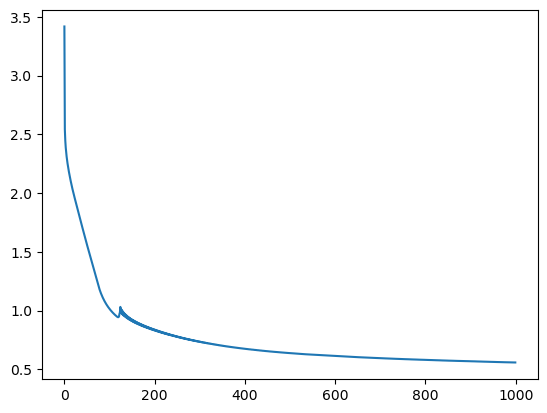

In [18]:
xpoints = np.arange(0, iterations)
plt.plot(xpoints, cost_list)
plt.show()

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardpropagation(W1, b1, W2, b2, X)
    prediction = predictions(A2)
    return prediction

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  2


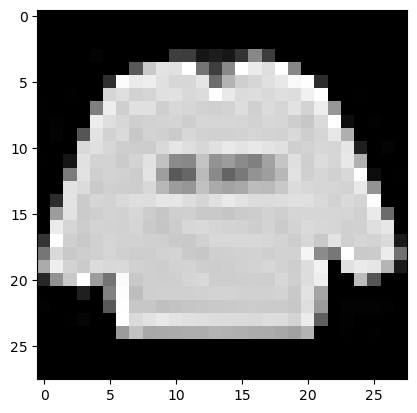

Prediction:  [7]
Label:  9


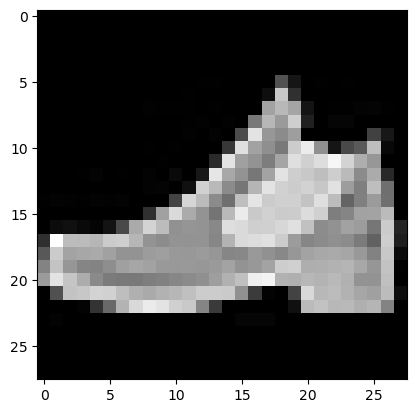

Prediction:  [6]
Label:  6


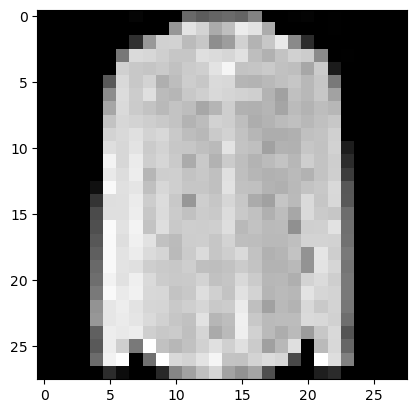

Prediction:  [0]
Label:  0


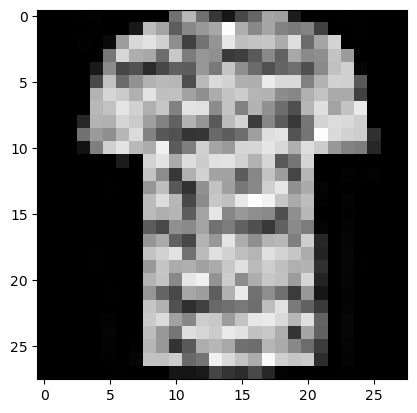

Prediction:  [3]
Label:  3


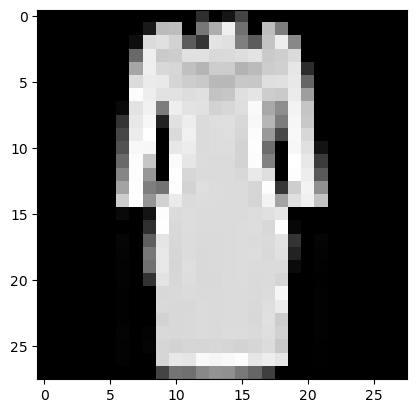

Prediction:  [6]
Label:  4


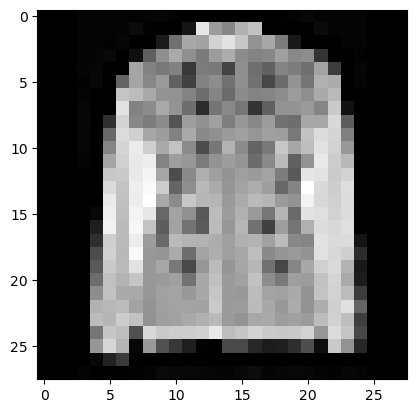

Prediction:  [4]
Label:  4


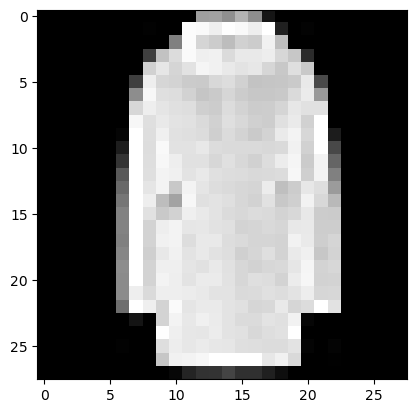

Prediction:  [5]
Label:  5


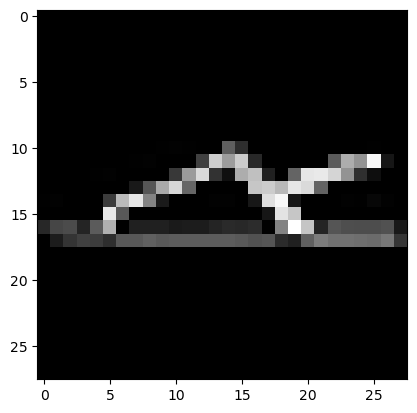

Prediction:  [4]
Label:  4


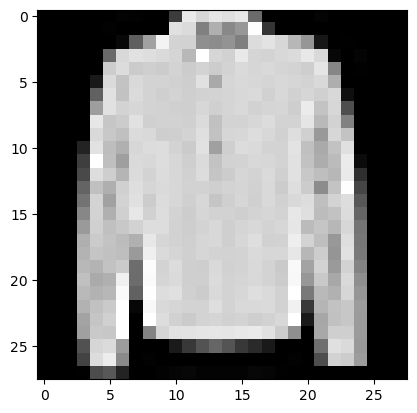

Prediction:  [8]
Label:  8


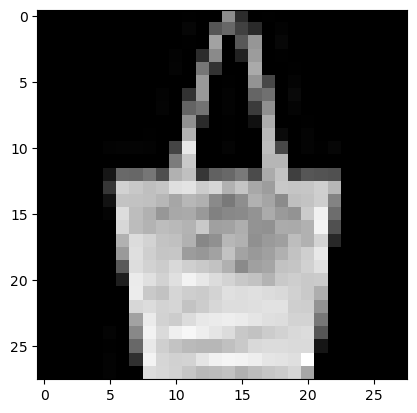

In [20]:
for i in range(10):
    test_prediction(i, W1, b1, W2, b2)

In [21]:
test_predictions = make_predictions(x_test, W1, b1, W2, b2)
accuracy(test_predictions, y_test)

[0 1 2 ... 8 2 2] [0 1 2 ... 8 8 1]


0.8008